# Regression

## Data Preparation

In [1]:
import torch
from torch.autograd import Variable
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# torch.linspace() generates a 1-D tensor, e.g., [-1, 0, 1]
# torch.unsqueeze() transforms [-1, 0, 1] into a 2-D tensor,
# i.e., [[-1], [0], [1]]
x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1) 
y = x.pow(2) + 0.2 * torch.rand(x.size()) # y = x^2 + noise

x, y = Variable(x), Variable(y)

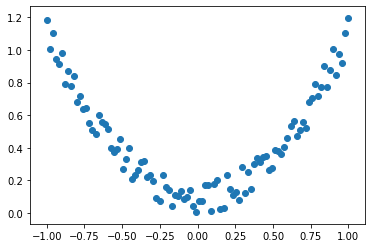

In [3]:
plt.scatter(x.data.numpy(), y.data.numpy())
plt.show()

## Build Netural Network

The network architecture is shown as follows:

```
  W1,b1     hidden      ReLu             W2,b2
x =====>     layer      =====>   h_out   =====> y_prediction
          (10 neurons)
```

In [4]:
class Net(torch.nn.Module):
    def __init__(self, n_features, n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(n_features, n_hidden) # n_hidden: number of neurons in the hidden layer 
        self.predict = torch.nn.Linear(n_hidden, n_output)
    
    def forward(self, x):
        h_out = torch.relu(self.hidden(x))
        y_prediction = self.predict(h_out)
        return y_prediction

In [5]:
net = Net(n_features=1, n_hidden=10, n_output=1) 
print(net)

Net(
  (hidden): Linear(in_features=1, out_features=10, bias=True)
  (predict): Linear(in_features=10, out_features=1, bias=True)
)


## Trainning

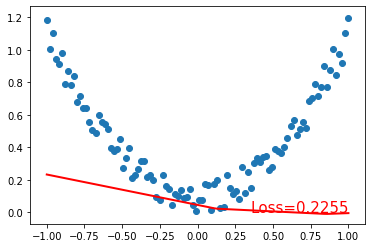

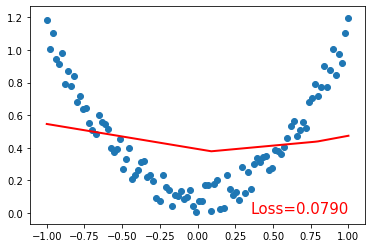

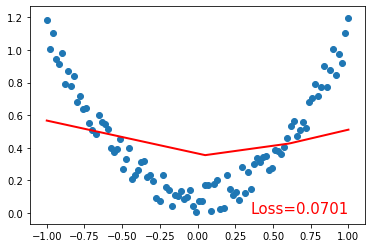

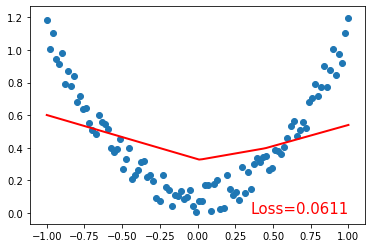

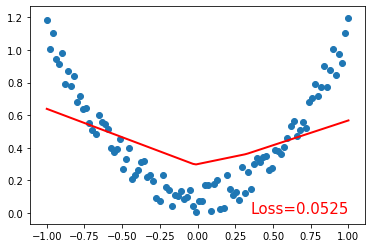

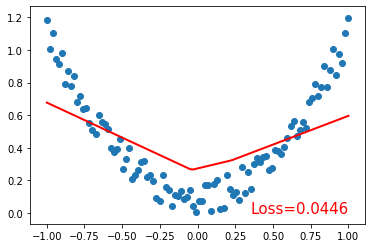

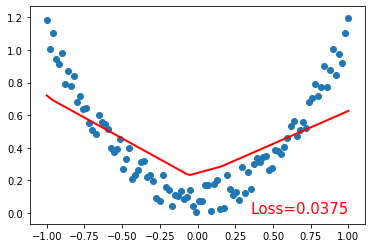

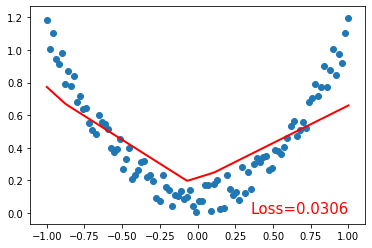

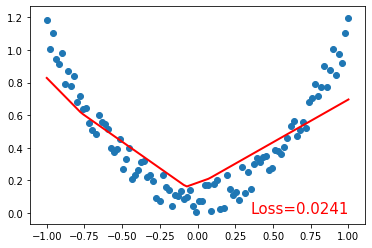

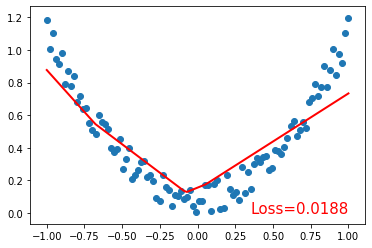

In [6]:
optimizer = torch.optim.SGD(net.parameters(), lr=0.2) # lr: learning rate
loss_function = torch.nn.MSELoss() # mean square error loss
epoch = 100

for i in range(epoch):
    prediction = net(x) # feed x into the net and return the prediction
    loss = loss_function(prediction, y) # compute the loss
    
    optimizer.zero_grad() # empty the gradients of the last step
    loss.backward() # backward pass to compute the gradients
    optimizer.step() # update the parameters 
    
     # plot learning process
    if i%10 == 0:
        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.plot(x.data.numpy(), prediction.data.numpy(), 'red', lw=2)
        plt.text(0.35, 0, 'Loss=%.4f' % loss.data.numpy(), fontdict={'size': 15, 'color':  'red'})
        plt.show()

In [7]:
for param in net.named_parameters():
    print(param[0])

hidden.weight
hidden.bias
predict.weight
predict.bias


In [8]:
print('W1:', list(net.parameters())[0].data.numpy(), 
      '\n\n', 'b1:', list(net.parameters())[1].data.numpy(),
      '\n\n', 'W2:', list(net.parameters())[2].data.numpy(),
      '\n\n', 'b2:', list(net.parameters())[3].data.numpy())

W1: [[-0.5893912 ]
 [ 0.09416744]
 [-1.2165753 ]
 [-0.29925287]
 [ 0.8185081 ]
 [ 0.5293319 ]
 [ 0.5670434 ]
 [-0.49147367]
 [-0.2205671 ]
 [-0.3850162 ]] 

 b1: [ 0.02552708  0.24323086 -0.09357487 -0.8647474   0.49870658  0.634094
 -0.7644712   0.5443567  -0.35960448 -0.9660789 ] 

 W2: [[ 0.3921814  -0.15503915  0.94630307 -0.14685838  0.45427334  0.34726062
   0.01485911 -0.22197333 -0.21102998  0.1665586 ]] 

 b2: [-0.17103228]
